# CZ3006 Lab 4
## Analyzing Network traffic log data using python

The objective of this laboratory session is to have a first hand experience in doing basic analysis of data log. The student is required to write simple python codes to decipher the network traffic data captured and stored as Microsoft Excel file (.csv), download from the NTULearn. The program shown be able to generate the following information.

1. Top 5 Talkers. (ie sender nodes)<br>
2. Top 5 Listeners (ie receiving node)<br>
3. Top 5 applications<br>
4. Total traffic<br>
5. Proportion of TCP and UDP packets<br>
6. Top 5 communication pair<br>
7. Visualizing the communication between different IP hosts

## Importing basic libraries

In [36]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
sb.set()

In [2]:
sampledata = pd.read_csv('SFlow_Data_lab4.csv',header = None) 
sampledata.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.22,...,6,0x00,50,51216.0,23505,0x10,1518,1500,2048,NaN
1,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,...,6,0x00,56,23159.0,80,0x10,74,52,2048,NaN
2,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,...,6,0x00,50,50041.0,20739,0x10,1518,1500,2048,NaN
3,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,...,17,0x00,120,54241.0,26510,0x10,116,94,2048,NaN
4,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,...,6,0x00,56,53923.0,34262,0x10,70,52,2048,NaN


In [3]:
sampledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69370 entries, 0 to 69369
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       69370 non-null  object 
 1   1       69370 non-null  object 
 2   2       69370 non-null  int64  
 3   3       69370 non-null  int64  
 4   4       69370 non-null  object 
 5   5       69370 non-null  object 
 6   6       69370 non-null  object 
 7   7       69370 non-null  float64
 8   8       69370 non-null  int64  
 9   9       69370 non-null  object 
 10  10      69370 non-null  object 
 11  11      69370 non-null  int64  
 12  12      69370 non-null  object 
 13  13      69370 non-null  int64  
 14  14      69370 non-null  float64
 15  15      69370 non-null  int64  
 16  16      69370 non-null  object 
 17  17      69370 non-null  int64  
 18  18      69370 non-null  int64  
 19  19      69370 non-null  int64  
 20  20      1305 non-null   float64
dtypes: float64(3), int64(9), object(9)


In [4]:
data = sampledata.drop(20, axis = 1)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.22,140.115.32.81,6,0x00,50,51216.0,23505,0x10,1518,1500,2048
1,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
2,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
3,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
4,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048


In [6]:
pdata = data.rename(columns={0: "Type", 1: "sflow_agent_address",2: "inputPort",3: "outputPort",4: "src_MAC",5: "dst_MAC",6: "ethernet_type",7: "in_vlan" ,8: "out_vlan",9: "src_IP",10: "dst_IP",11: "IP_protocol",12: "ip_tos",13: "ip_ttl",14: "udp_src_port/tcp_src_port/icmp_type",15: "udp_dst_port/tcp_dst_port/icmp_code",16: "tcp_flags",17: "packet_size",18: "IP_size",19: "sampling_rate"})

In [7]:
pdata.head()

,Type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,udp_src_port/tcp_src_port/icmp_type,udp_dst_port/tcp_dst_port/icmp_code,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.22,140.115.32.81,6,0x00,50,51216.0,23505,0x10,1518,1500,2048
1,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
2,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
3,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
4,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048


## 1. Top 5 Talkers (sender nodes)

Columns to take note of: src_IP

Each flow has a source node, so if we count the number of each src_IP, we should be able to get the top 5 talkers.

We can get the counts of each specific src_MAC, meaning we group by src_IP and count each instance of a src_IP.

In [8]:
talkers = pdata.groupby(['src_IP'])['src_IP'].count()
talkerscount = talkers.reset_index(name='count').sort_values(['count'], ascending=False)

In [9]:
top5talkers = talkerscount.head()
top5talkers

,src_IP,count
2259,193.62.192.8,3041
1342,155.69.160.32,2975
619,130.14.250.11,2604
948,14.139.196.58,2452
1036,140.112.8.139,2056


## 2. Top 5 Listeners (receiver nodes)

Columns to take note of: dst_IP

Following the logic of talkers.

In [10]:
listeners = pdata.groupby(['dst_IP'])['dst_IP'].count()
listenerscount = listeners.reset_index(name='count').sort_values(['count'], ascending=False)

In [11]:
top5listeners = listenerscount.head()
top5listeners

,dst_IP,count
72,103.37.198.100,3841
685,137.132.228.15,3715
1815,202.21.159.244,2446
1556,192.101.107.153,2368
31,103.21.126.2,2056


## 3. Top 5 applications

Columns to take note of: udp_dst_port/tcp_dst_port/icmp_code

This column describes the Destination port address which define the application service requested. So, if we count the number of instances for each application, we can get the top 5 applications.

However, we should only choose those entries within the range of well-known port numbers as those that are not are transmitting back to the sender requesting the services. (0-1023)

We also exclude 0 as it is a wildcard port.

In [33]:
ports = pdata.groupby(['udp_dst_port/tcp_dst_port/icmp_code'])['udp_dst_port/tcp_dst_port/icmp_code'].count()
portscount = ports.reset_index(name='count').sort_values(['count'], ascending=False)

apps = portscount.loc[(portscount['udp_dst_port/tcp_dst_port/icmp_code'] > 0)]

In [34]:
top5apps = apps.head()
top5apps

,udp_dst_port/tcp_dst_port/icmp_code,count
22,443,13423
10,80,2647
4799,52866,2068
3664,45512,1356
5276,56152,1341


In [35]:
wellknownapps = portscount.loc[(portscount['udp_dst_port/tcp_dst_port/icmp_code'] < 1024) & (portscount['udp_dst_port/tcp_dst_port/icmp_code'] > 0)]
top5wellknownapps = wellknownapps.head()
top5wellknownapps

,udp_dst_port/tcp_dst_port/icmp_code,count
22,443,13423
10,80,2647
6,22,375
5,21,324
27,873,258


## 4. Total traffic

Get the total traffic in MegaBytes

In [14]:
totaltraffic = pdata['IP_size'].sum()

print('Total traffic: {:.2f} MegaBytes'
      .format( totaltraffic / (10**6) ))

Total traffic: 64.78 MegaBytes


## 5. Proportion of TCP and UDP packets

Columns to take note of: IP_protocol

TCP = 6<br>
UDP = 17

In [15]:
protocols = pdata.groupby(['IP_protocol'])['IP_protocol'].count()
protocolcount = protocols.reset_index(name='count').sort_values(['count'], ascending=False)
protocolcount

,IP_protocol,count
2,6,56064
3,17,9462
6,50,1698
0,0,1261
5,47,657
4,41,104
1,1,74
9,381,45
7,58,4
8,103,1


In [30]:
TCPcount = protocolcount.loc[protocolcount['IP_protocol'] == 6]
UDPcount = protocolcount.loc[protocolcount['IP_protocol'] == 17]
total = pdata['IP_protocol'].count()
print(total)

69370


In [31]:
TCPproportion = (TCPcount['count']/total) * 100
print(TCPproportion)

2    80.818798
Name: count, dtype: float64


In [32]:
UDPproportion = (UDPcount['count']/total) * 100
print(UDPproportion)

3    13.639902
Name: count, dtype: float64


## 6. Top 5 communication pairs

In [21]:
communicationPairs = pdata
communicationPairs = communicationPairs.assign(commPairs=None)

for index, row in pdata.iterrows():
    commPairs = []
    commPairs.append(row['src_IP'])
    commPairs.append(row['dst_IP'])
    commPairs.sort()
    commPairsTuple = tuple(commPairs)
    communicationPairs.at[index, 'commPairs'] = commPairsTuple

count_sorted_pairs = communicationPairs.groupby('commPairs').size().reset_index(name='numPackets')
sorted_pairs = count_sorted_pairs.sort_values(['numPackets'], ascending=False)
top5_sorted_pairs = sorted_pairs.head(5)

print("{:<20}{:<20}{}".format("IP address 1", "IP address 2", "# of Packets"))
for index, row in top5_sorted_pairs.iterrows():
    print("{:<20}{:<20}{}".format(row['commPairs'][0], row['commPairs'][1], row['numPackets']))

IP address 1        IP address 2        # of Packets
137.132.228.15      193.62.192.8        4951
103.37.198.100      130.14.250.11       2842
14.139.196.58       192.101.107.153     2368
103.21.126.2        140.112.8.139       2056
140.90.101.61       167.205.52.8        1752


## 7. Visualization of communications between different IP hosts

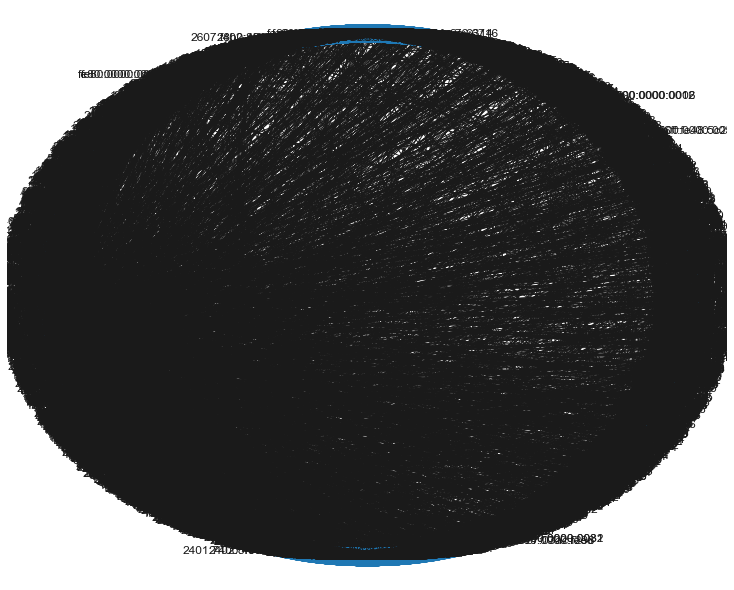

In [22]:
network = pdata[['src_IP','dst_IP']]

G = nx.Graph()

G = nx.from_pandas_edgelist(network, 'src_IP', 'dst_IP')

plt.figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

### Top 5 talkers communication

Source:  14.139.196.58
13


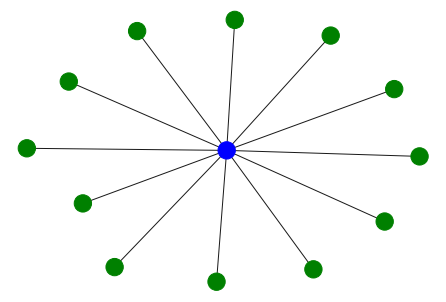

Source:  193.62.192.8
2


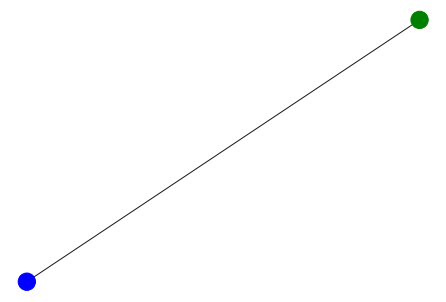

Source:  155.69.160.32
262


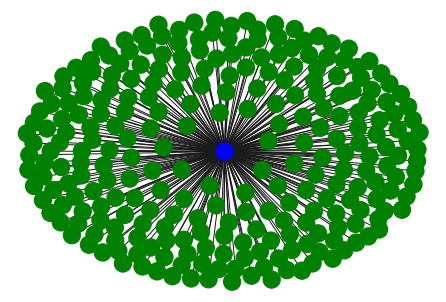

Source:  130.14.250.11
3


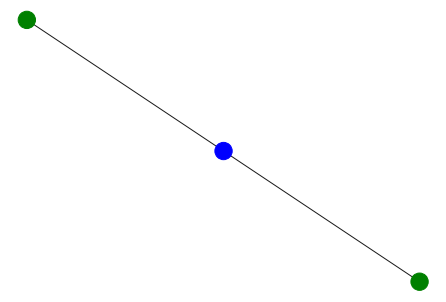

Source:  140.112.8.139
2


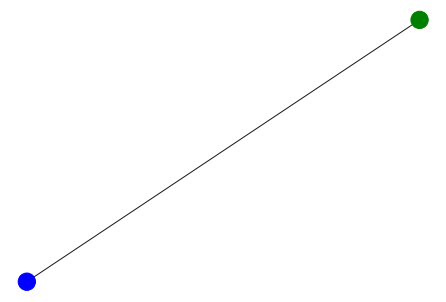

In [43]:
top5talkersvalue = top5talkers['src_IP'].value_counts()

for talker in top5talkersvalue.keys():
    colors = []
    net = pdata.loc[pdata['src_IP'] == talker]
    net = net[['src_IP', 'dst_IP']]
    print('Source: ', talker)

    G = nx.Graph()
    G = nx.from_pandas_edgelist(net, 'src_IP', 'dst_IP')
    
    for node in G:
        if node in talker:          
            colors.append('blue') 
        else:                       
            colors.append('green')
    
    nx.draw(G, with_labels=False, node_color=colors)
    print(len(G))
    plt.show()

### Top 5 listeners communication

Destination:  103.37.198.100
4


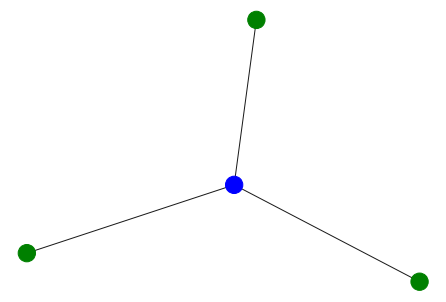

Destination:  192.101.107.153
2


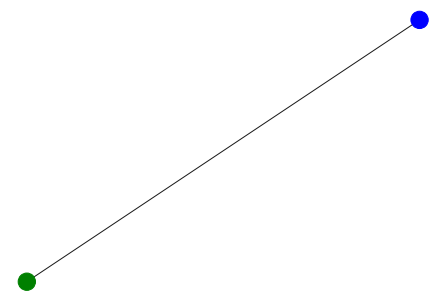

Destination:  103.21.126.2
2


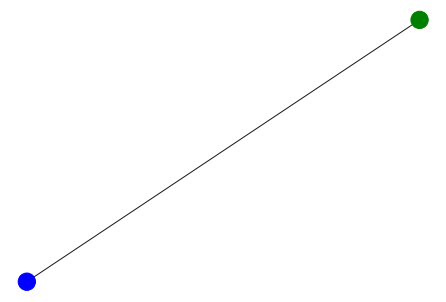

Destination:  137.132.228.15
3


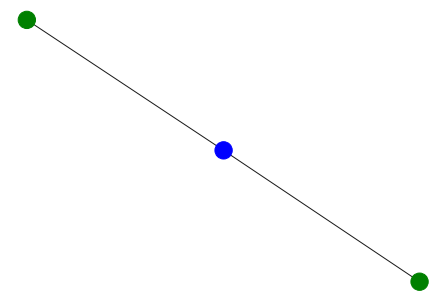

Destination:  202.21.159.244
69


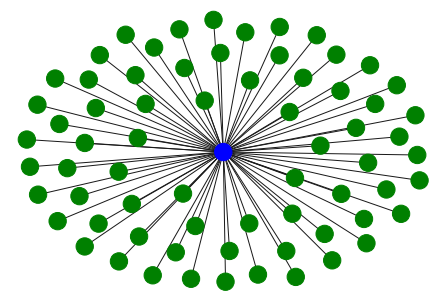

In [47]:
top5listenersvalue = top5listeners['dst_IP'].value_counts()

for listener in top5listenersvalue.keys():
    colors = []
    net = pdata.loc[pdata['dst_IP'] == listener]
    net = net[['src_IP', 'dst_IP']]
    print('Destination: ', listener)

    G = nx.Graph()
    G = nx.from_pandas_edgelist(net, 'src_IP', 'dst_IP')
    
    for node in G:
        if node in listener:          
            colors.append('blue') 
        else:                       
            colors.append('green')
    
    nx.draw(G, with_labels=False, node_color=colors)
    print(len(G))
    plt.show()